In [23]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

datos_titanic = pd.read_csv("titanic.csv")

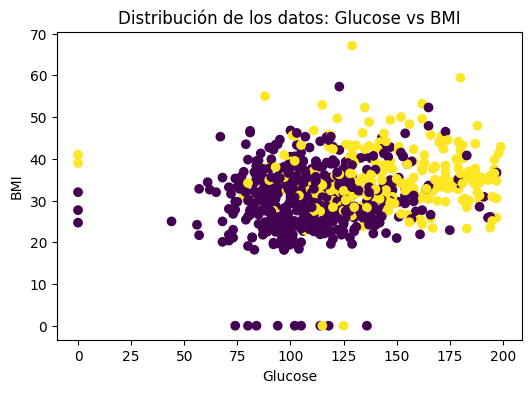

Predicción para el nuevo paciente: Diabetes


In [31]:
#%% cargar datos de diabetes
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.columns
#%% X atributos, y etiqueta
X = df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df_diabetes['Outcome']
#%% para usar solo 2 atributos
X2 = df_diabetes[['Glucose', 'BMI']].values
y = df_diabetes['Outcome'].values
#%% gráfico de dispersión
plt.figure(figsize=(6, 4))
plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Distribución de los datos: Glucose vs BMI')
plt.show()
#%% construyo y ajusto el clasificador
clasificador = KNeighborsClassifier(n_neighbors=10)
clasificador.fit(X2, y)
#%% predicción para un nuevo paciente
nuevo_paciente = [[130, 32.0]] 
prediccion = clasificador.predict(nuevo_paciente)
print("Predicción para el nuevo paciente:", "Diabetes" if prediccion[0] == 1 else "No diabetes")
#%%



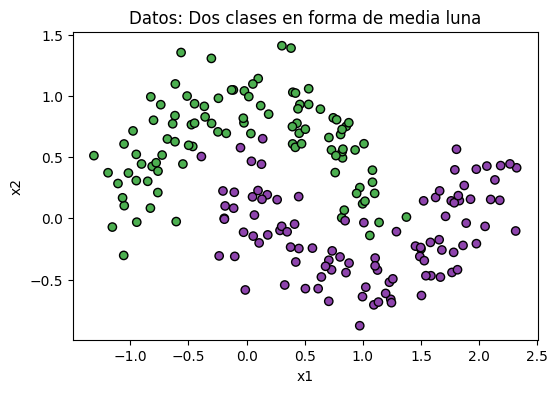

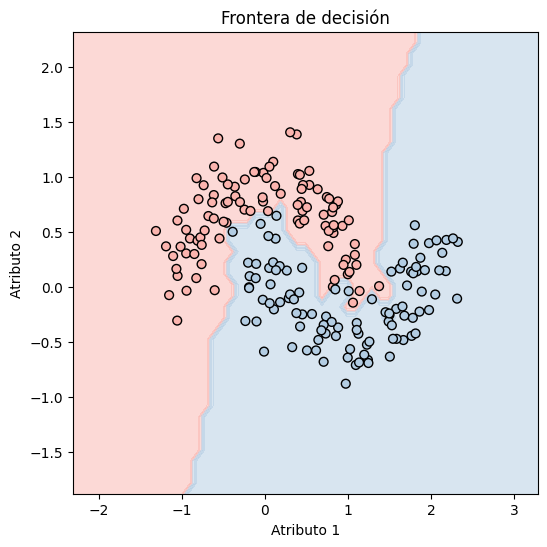

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
#%% función para graficar la forontera de decision
def plot_decision_boundary(X, y, clf):
    fig, ax = plt.subplots(figsize=(6, 6))    
    # Crear grilla
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) 
    # Predecir clases en cada punto de la grilla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Colores
    n_classes = len(np.unique(y))
    colors = plt.cm.Pastel1.colors[:n_classes]
    cmap_light = ListedColormap(colors)
    cmap_bold = ListedColormap(colors)
    # Graficar la frontera de decisión
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=40, edgecolor='k')
    ax.set_xlabel("Atributo 1")
    ax.set_ylabel("Atributo 2")
    ax.set_title("Frontera de decisión")
#%% generar los datos
X, y = make_moons(n_samples=200, noise=0.2)
#%% gráfico de dispersión
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#4CAF50', '#8e44ad']), edgecolor='k')
plt.title("Datos: Dos clases en forma de media luna")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
#%% clasificador
clf1 = KNeighborsClassifier(n_neighbors=1)  # <- completar valor de k
clf1.fit(X, y)
plot_decision_boundary( X, y,clf1)

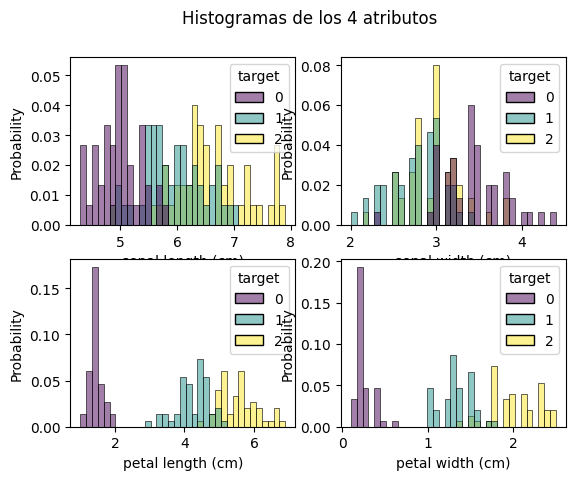

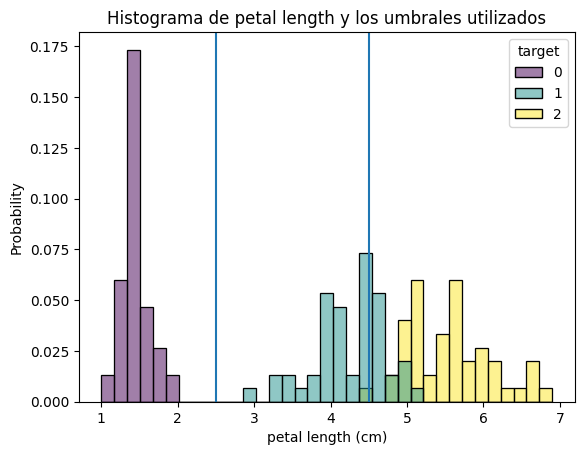

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



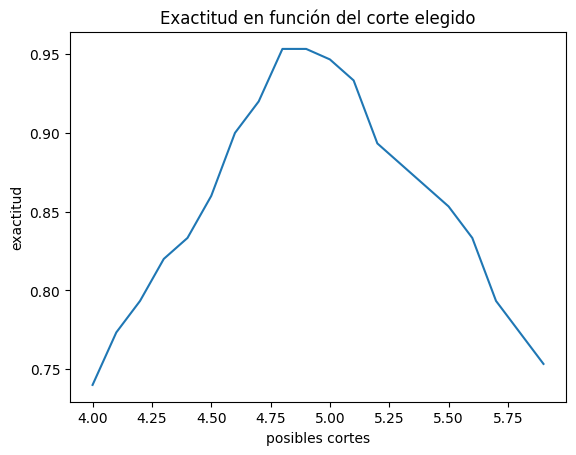

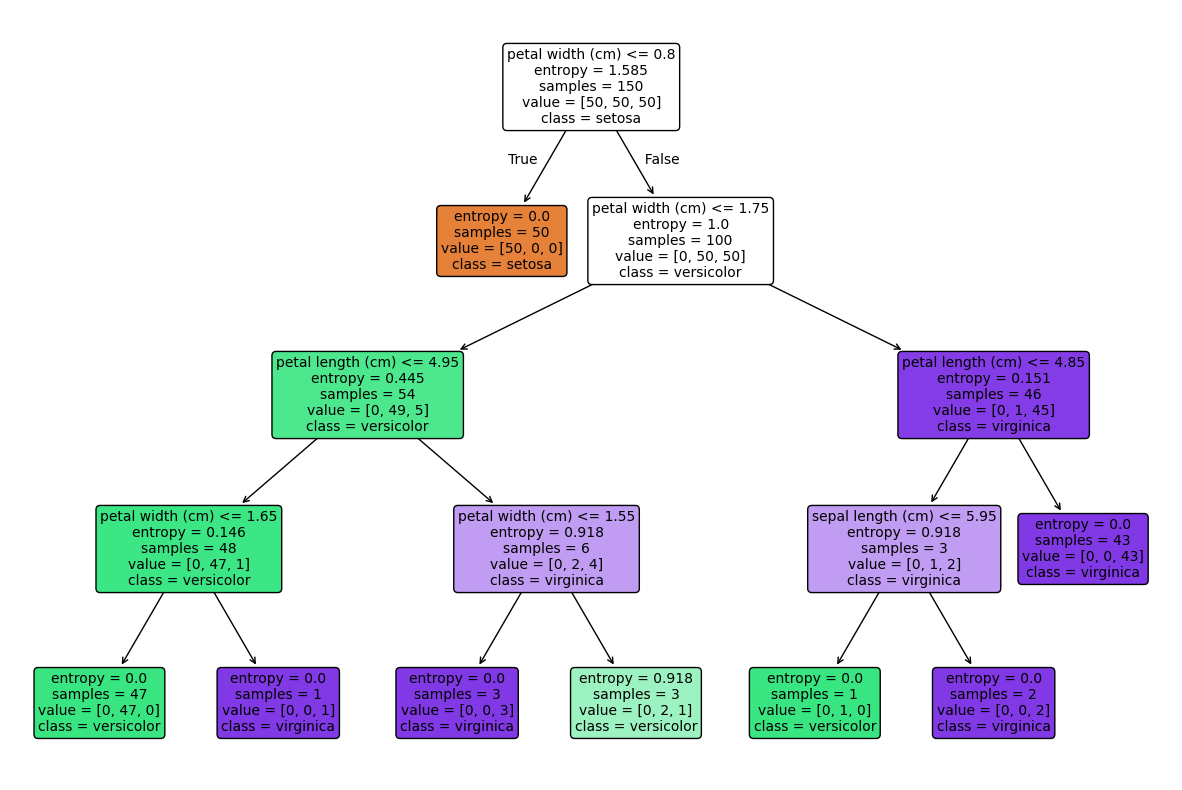

In [40]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 26 16:05:03 2023

@author: mcerdeiro
"""

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
import pandas as pd

#%%######################

        ####            Análisis exploratorio

#########################
#%%        


iris = load_iris(as_frame = True)

data = iris.frame
atributos = iris.data
Y = iris.target

iris.target_names
diccionario = dict(zip( [0,1,2], iris.target_names))
#%%
atri = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
#%%
nbins = 35

f, s = plt.subplots(2,2)
plt.suptitle('Histogramas de los 4 atributos', size = 'large')


sns.histplot(data = data, x = 'sepal length (cm)', hue = 'target', bins = nbins, stat = 'probability', ax=s[0,0], palette = 'viridis')

sns.histplot(data = data, x = 'sepal width (cm)', hue = 'target', bins = nbins, stat = 'probability', ax=s[0,1], palette = 'viridis')

sns.histplot(data = data, x = 'petal length (cm)', hue = 'target', bins = nbins, stat = 'probability', ax=s[1,0], palette = 'viridis')

sns.histplot(data = data, x = 'petal width (cm)', hue = 'target', bins = nbins, stat = 'probability', ax=s[1,1], palette = 'viridis')


#%%######################

        ####            Métodos de umbral

#########################
#%%        

def clasificador_iris(fila):
    pet_l = fila['petal length (cm)']
    if pet_l < 2.5:
        clase = 0
    elif pet_l < 4.5:
        clase = 1
    else:
        clase = 2
    return clase
#%%
umbral_0 = 2.5
umbral_1 = 4.5

plt.figure()
plt.title('Histograma de petal length y los umbrales utilizados')
sns.histplot(data = data, x = 'petal length (cm)', hue = 'target', bins = nbins, stat = 'probability',  palette = 'viridis')
plt.axvline(x=umbral_0)
plt.axvline(x=umbral_1)
plt.show()
#%%
data_clasif = data.copy()
data_clasif['clase_asignada'] = atributos.apply(lambda row: clasificador_iris(row), axis=1)
        
#clasificador_iris(data['sepal length (cm)'], data['sepal width (cm)'], data['petal length (cm)'], data['petal width (cm)'])
#%%

clases = set(data['target'])

matriz_confusion = np.zeros((3,3))


for i in range(3):
  for j in range(3):
    filtro = (data_clasif['target']== i) & (data_clasif['clase_asignada'] == j)
    cuenta = len(data_clasif[filtro])
    matriz_confusion[i, j] = cuenta
  
matriz_confusion

#%%

exacti = sum(data_clasif['target']== data_clasif['clase_asignada'])

#%%
def exactitud(clasif):
    data_temp = data_clasif.copy()
    data_temp['clase_asignada'] = atributos.apply(lambda row: clasif(row), axis=1)
    suma = sum(data_temp['target']== data_temp['clase_asignada'])
    total = len(data_clasif)
    return suma/total

    

#%%
posibles_cortes = np.arange(start= 4, stop= 6, step=0.1)
exactitudes = []

for c in posibles_cortes:
    def clasificador_temp(fila):
        pet_l = fila['petal length (cm)']
        if pet_l < 2.5:
            clase = 0
        elif pet_l < c:
            clase = 1
        else:
            clase = 2
        return clase
    exact_c = exactitud(clasificador_temp)
    exactitudes.append(exact_c)

#%%
plt.plot(posibles_cortes, exactitudes)
plt.xlabel('posibles cortes')
plt.ylabel('exactitud')
plt.title('Exactitud en función del corte elegido')
#%%
max(exactitudes)
np.argmax(exactitudes)

exactitudes[8]
corte_selec = posibles_cortes[np.argmax(exactitudes)]

#%%######################

        ####            Árboles de decisión

#########################
#%%

X = atributos
Y = data['target']
#%%        
        
clf_info = tree.DecisionTreeClassifier(criterion = "entropy", max_depth= 4)
clf_info = clf_info.fit(X, Y)


plt.figure(figsize= [15,10])
tree.plot_tree(clf_info, feature_names = iris['feature_names'], class_names = iris['target_names'],filled = True, rounded = True, fontsize = 10)
#%%

datonuevo= pd.DataFrame([dict(zip(iris['feature_names'], [6.8,3,4.5, 2.15]))])
clf_info.predict(datonuevo)


#%%
# otra forma de ver el arbol
r = tree.export_text(clf_info, feature_names=iris['feature_names'])
print(r)
#%%













